In [111]:
import pandas as pd
import numpy as np

# TheMovieDB.org - tmdb.movies.csv

*only movies from 2010-2018

*from https://developers.themoviedb.org/3/discover/movie-discover

In [2]:
tmdb_df = pd.read_csv("data/tmdb.movies.csv.gz")
tmdb_df.head()

Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
3                                     Toy Story           7.9       10174  
4                                     Inception           8.3       22186

In [3]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# TheMovieDB.org - tn.movie_budgets.csv

*includes all movies from https://www.the-numbers.com/movie/budgets/all

In [4]:
tn_budgets_df = pd.read_csv("data/tn.movie_budgets.csv.gz")
tn_budgets_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [5]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


# IMDB Title Basics

In [6]:
imdb_title_basics_df = pd.read_csv('data/imdb.title.basics.csv.gz')
imdb_title_basics_df.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [7]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
#imdb_title_basics_df.join(tn_budgets_df, how="left")

In [9]:
imdb_title_basics_df = imdb_title_basics_df.rename(columns = {'primary_title': 'movie', "release_date": "start_year"})
imdb_title_basics_df.head()

tconst                            movie              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [10]:
tn_budgets_df["start_year"] = tn_budgets_df.release_date.map(lambda x: int(x[-4:]))
tn_budgets_df.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  start_year  
0      $425,000,000   $760,507,625  $2,776,345,279        2009  
1      $410,600,000   $241,063,875  $1,045,663,875        2011  
2      $350,000,000    $42,762,350    $149,762,350        2019  
3      $330,600,000   $459,005,868  $1,403,013,963        2015  
4      $317,000,000   $620,181,382  $1,316,721,747        2017

In [11]:
total_df = pd.merge(imdb_title_basics_df, tn_budgets_df, on=["movie", "start_year"])

In [12]:
total_df.head()

tconst                            movie  \
0  tt0249516                       Foodfight!   
1  tt0359950  The Secret Life of Walter Mitty   
2  tt0365907      A Walk Among the Tombstones   
3  tt0369610                   Jurassic World   
4  tt0376136                    The Rum Diary   

                    original_title  start_year  runtime_minutes  \
0                       Foodfight!        2012             91.0   
1  The Secret Life of Walter Mitty        2013            114.0   
2      A Walk Among the Tombstones        2014            114.0   
3                   Jurassic World        2015            124.0   
4                    The Rum Diary        2011            119.0   

                    genres  id  release_date production_budget domestic_gross  \
0  Action,Animation,Comedy  26  Dec 31, 2012       $45,000,000             $0   
1   Adventure,Comedy,Drama  37  Dec 25, 2013       $91,000,000    $58,236,838   
2       Action,Crime,Drama  67  Sep 19, 2014       $28,000,000    $26,017,685   
3  Action,Adventure,Sci-Fi  34  Jun 12, 2015      $215,000,000   $652,270,625   
4             Comedy,Drama  16  Oct 28, 2011       $45,000,000    $13,109,815   

  worldwide_gross  
0         $73,706  
1    $187,861,183  
2     $62,108,587  
3  $1,648,854,864  
4     $21,544,732

In [13]:
total_df = total_df.drop("original_title", axis=1)

In [14]:
total_df.production_budget = total_df.production_budget.map(lambda x: x.replace("$", ""))

In [15]:
total_df.production_budget = total_df.production_budget.map(lambda x: x.replace(",", ""))

In [16]:
total_df.domestic_gross = total_df.domestic_gross.map(lambda x: x.replace("$", ""))

In [17]:
total_df.domestic_gross = total_df.domestic_gross.map(lambda x: x.replace(",", ""))

In [18]:
total_df.worldwide_gross = total_df.worldwide_gross.map(lambda x: x.replace("$", ""))

In [19]:
total_df.worldwide_gross = total_df.worldwide_gross.map(lambda x: x.replace(",", ""))

In [20]:
total_df.production_budget = total_df.production_budget.map(lambda x: int(x))

In [21]:
total_df.domestic_gross = total_df.domestic_gross.map(lambda x: int(x))

In [22]:
total_df.worldwide_gross = total_df.worldwide_gross.map(lambda x: int(x))

In [23]:
total_df.head()

tconst                            movie  start_year  runtime_minutes  \
0  tt0249516                       Foodfight!        2012             91.0   
1  tt0359950  The Secret Life of Walter Mitty        2013            114.0   
2  tt0365907      A Walk Among the Tombstones        2014            114.0   
3  tt0369610                   Jurassic World        2015            124.0   
4  tt0376136                    The Rum Diary        2011            119.0   

                    genres  id  release_date  production_budget  \
0  Action,Animation,Comedy  26  Dec 31, 2012           45000000   
1   Adventure,Comedy,Drama  37  Dec 25, 2013           91000000   
2       Action,Crime,Drama  67  Sep 19, 2014           28000000   
3  Action,Adventure,Sci-Fi  34  Jun 12, 2015          215000000   
4             Comedy,Drama  16  Oct 28, 2011           45000000   

   domestic_gross  worldwide_gross  
0               0            73706  
1        58236838        187861183  
2        26017685         62108587  
3       652270625       1648854864  
4        13109815         21544732

In [24]:
total_df['ROI'] = total_df.worldwide_gross - total_df.production_budget

In [25]:
total_df.head()

tconst                            movie  start_year  runtime_minutes  \
0  tt0249516                       Foodfight!        2012             91.0   
1  tt0359950  The Secret Life of Walter Mitty        2013            114.0   
2  tt0365907      A Walk Among the Tombstones        2014            114.0   
3  tt0369610                   Jurassic World        2015            124.0   
4  tt0376136                    The Rum Diary        2011            119.0   

                    genres  id  release_date  production_budget  \
0  Action,Animation,Comedy  26  Dec 31, 2012           45000000   
1   Adventure,Comedy,Drama  37  Dec 25, 2013           91000000   
2       Action,Crime,Drama  67  Sep 19, 2014           28000000   
3  Action,Adventure,Sci-Fi  34  Jun 12, 2015          215000000   
4             Comedy,Drama  16  Oct 28, 2011           45000000   

   domestic_gross  worldwide_gross         ROI  
0               0            73706   -44926294  
1        58236838        187861183    96861183  
2        26017685         62108587    34108587  
3       652270625       1648854864  1433854864  
4        13109815         21544732   -23455268

In [26]:
total_df.sort_values("ROI", ascending=False)

tconst                             movie  start_year  \
1336   tt4154756            Avengers: Infinity War        2018   
3      tt0369610                    Jurassic World        2015   
1110   tt2820852                         Furious 7        2015   
82     tt0848228                      The Avengers        2012   
731    tt1825683                     Black Panther        2018   
1420   tt4881806    Jurassic World: Fallen Kingdom        2018   
960    tt2294629                            Frozen        2013   
1103   tt2771200              Beauty and the Beast        2017   
958    tt2293640                           Minions        2015   
1014   tt2395427           Avengers: Age of Ultron        2015   
1256   tt3606756                     Incredibles 2        2018   
305    tt1300854                        Iron Man 3        2013   
444    tt1477834                           Aquaman        2018   
1386   tt4630562           The Fate of the Furious        2017   
1225   tt3469046                   Despicable Me 3        2017   
1335   tt4154664                    Captain Marvel        2019   
380    tt1399103    Transformers: Dark of the Moon        2011   
161    tt1074638                           Skyfall        2012   
637    tt1690953                   Despicable Me 2        2013   
874    tt2109248   Transformers: Age of Extinction        2014   
1229   tt3498820        Captain America: Civil War        2016   
956    tt2283362    Jumanji: Welcome to the Jungle        2017   
1136   tt2948356                          Zootopia        2016   
14     tt0435761                       Toy Story 3        2010   
1283   tt3748528      Rogue One: A Star Wars Story        2016   
672    tt1727824                 Bohemian Rhapsody        2018   
132    tt1014759               Alice in Wonderland        2010   
133    tt2049386               Alice in Wonderland        2010   
950    tt2277860                      Finding Dory        2016   
1091   tt2709768           The Secret Life of Pets        2016   
...          ...                               ...         ...   
1192   tt3289724                 Welcome to Marwen        2018   
725    tt1817771                  Freaks of Nature        2015   
154    tt1053810                      The Big Year        2011   
754    tt1860357                 Deepwater Horizon        2016   
140    tt1032751                 The Warrior's Way        2010   
630    tt1674784                          Trespass        2011   
809    tt1972591  King Arthur: Legend of the Sword        2017   
162    tt1075747                         Jonah Hex        2010   
847    tt2032572  USS Indianapolis: Men of Courage        2016   
1304   tt3864056                     The Goldfinch        2019   
134    tt1014763                          Child 44        2015   
995    tt2361317                     Live by Night        2016   
0      tt0249516                        Foodfight!        2012   
1130   tt2935510                          Ad Astra        2019   
1525   tt7134096                The Rhythm Section        2019   
1093   tt2717822                          Blackhat        2015   
58     tt0790736                          R.I.P.D.        2013   
1518   tt6924650                            Midway        2019   
1042   tt2479478                  The Ridiculous 6        2015   
1406   tt4743226                        Air Strike        2018   
148    tt1041804              The Nutcracker in 3D        2010   
125   tt10013288                       The Promise        2017   
126    tt4192918                       The Promise        2017   
128    tt9889072                       The Promise        2017   
127    tt7232438                       The Promise        2017   
1534   tt7504726                  Call of the Wild        2020   
1455   tt5519340                            Bright        2017   
955    tt2283336       Men in Black: International        2019   
310    tt1305591                   Mars Needs Moms

In [27]:
genres_df = total_df.genres.str.split(",", 2, expand=True)

In [28]:
total_df["genre1"] = genres_df[0]
total_df.head()

tconst                            movie  start_year  runtime_minutes  \
0  tt0249516                       Foodfight!        2012             91.0   
1  tt0359950  The Secret Life of Walter Mitty        2013            114.0   
2  tt0365907      A Walk Among the Tombstones        2014            114.0   
3  tt0369610                   Jurassic World        2015            124.0   
4  tt0376136                    The Rum Diary        2011            119.0   

                    genres  id  release_date  production_budget  \
0  Action,Animation,Comedy  26  Dec 31, 2012           45000000   
1   Adventure,Comedy,Drama  37  Dec 25, 2013           91000000   
2       Action,Crime,Drama  67  Sep 19, 2014           28000000   
3  Action,Adventure,Sci-Fi  34  Jun 12, 2015          215000000   
4             Comedy,Drama  16  Oct 28, 2011           45000000   

   domestic_gross  worldwide_gross         ROI     genre1  
0               0            73706   -44926294     Action  
1        58236838        187861183    96861183  Adventure  
2        26017685         62108587    34108587     Action  
3       652270625       1648854864  1433854864     Action  
4        13109815         21544732   -23455268     Comedy

In [29]:
total_df["genre2"] = genres_df[1]

In [30]:
total_df["genre3"] = genres_df[2]

In [31]:
total_df = total_df.drop("genres", axis=1)

In [32]:
total_df = total_df.drop("tconst", axis=1)

In [33]:
total_df = total_df.drop("id", axis=1)

In [34]:
total_df['release_month'] = total_df.release_date.map(lambda x: x[:3])

In [35]:
def month_to_num(x):
   if x == "Jan":
       x = 1
   elif x == "Feb":
       x = 2
   elif x == "Mar":
       x = 3
   elif x == "Apr":
       x = 4
   elif x == "May":
       x = 5
   elif x == "Jun":
       x = 6
   elif x == "Jul":
       x = 7
   elif x == "Aug":
       x = 8
   elif x == "Sep":
       x = 9
   elif x == "Oct":
       x = 10
   elif x == "Nov":
       x = 11
   elif x == "Dec":
       x = 12
   else:
       x = None
   return x

In [36]:
total_df.release_month = total_df.release_month.map(lambda x: month_to_num(x))

In [37]:
total_df.head()

movie  start_year  runtime_minutes  release_date  \
0                       Foodfight!        2012             91.0  Dec 31, 2012   
1  The Secret Life of Walter Mitty        2013            114.0  Dec 25, 2013   
2      A Walk Among the Tombstones        2014            114.0  Sep 19, 2014   
3                   Jurassic World        2015            124.0  Jun 12, 2015   
4                    The Rum Diary        2011            119.0  Oct 28, 2011   

   production_budget  domestic_gross  worldwide_gross         ROI     genre1  \
0           45000000               0            73706   -44926294     Action   
1           91000000        58236838        187861183    96861183  Adventure   
2           28000000        26017685         62108587    34108587     Action   
3          215000000       652270625       1648854864  1433854864     Action   
4           45000000        13109815         21544732   -23455268     Comedy   

      genre2  genre3  release_month  
0  Animation  Comedy             12  
1     Comedy   Drama             12  
2      Crime   Drama              9  
3  Adventure  Sci-Fi              6  
4      Drama    None             10

In [38]:
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


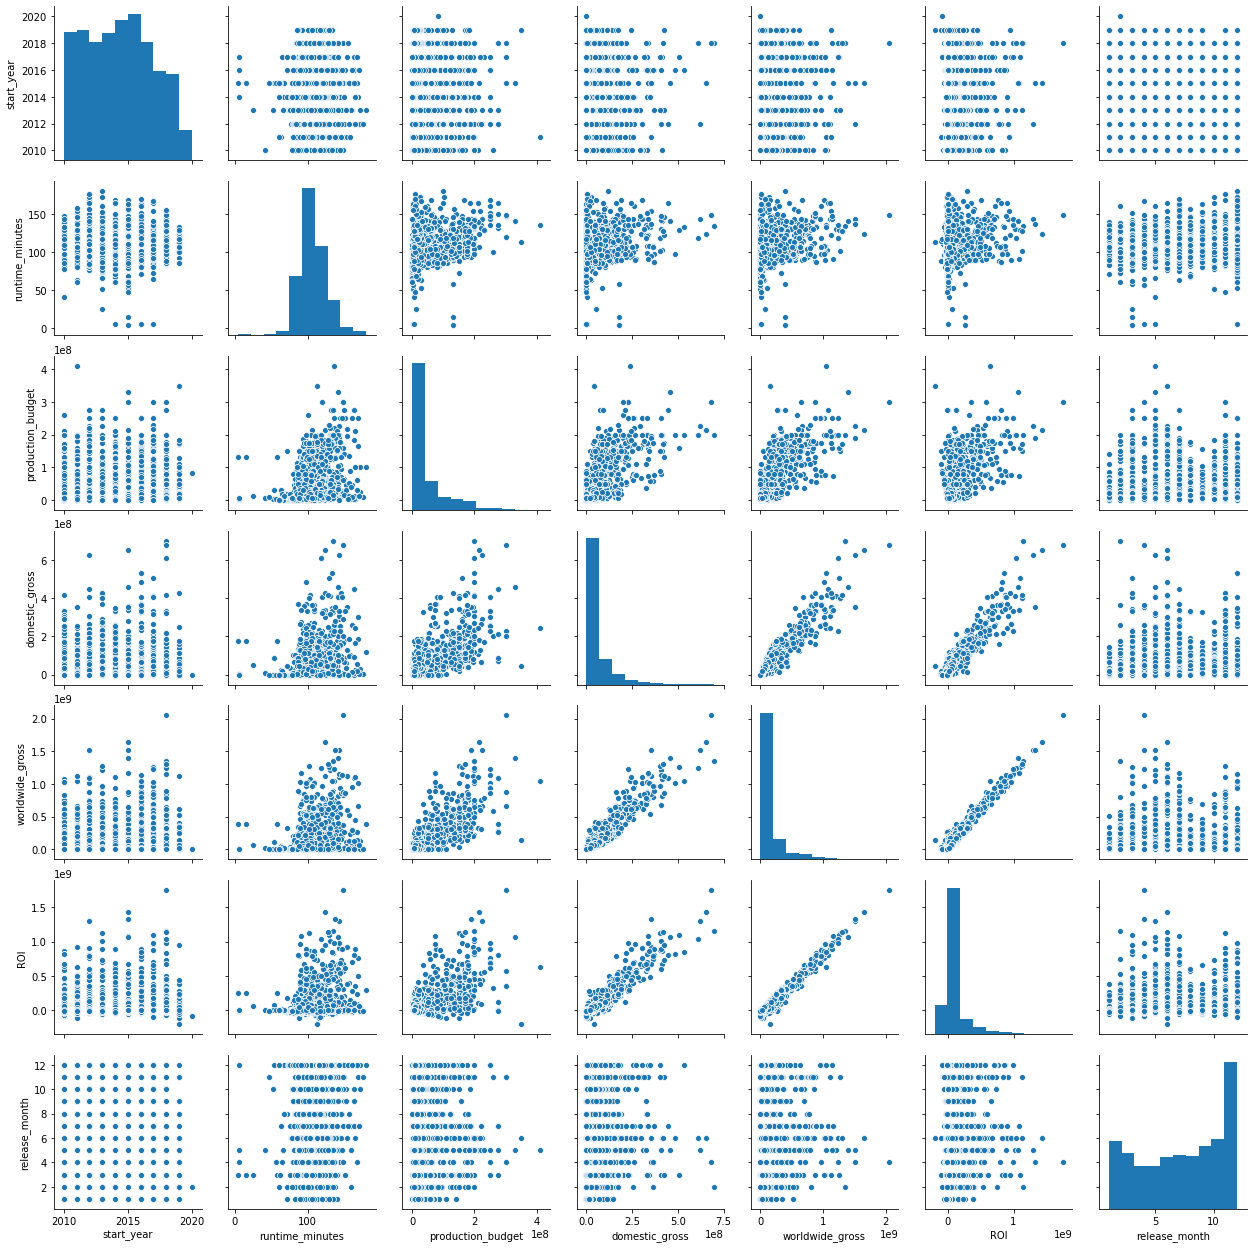

In [39]:
sns.pairplot(total_df)

In [40]:
import matplotlib.pyplot as plt

In [41]:
release_month_means = total_df.groupby("release_month").mean()["ROI"].map(lambda x: x/1000000)

In [42]:
release_month_means

release_month
1      48.243102
2      94.251143
3     112.447072
4     103.950744
5     161.922945
6     159.251822
7     133.916698
8      56.084235
9      39.296393
10     48.152467
11    122.069473
12     77.219863
Name: ROI, dtype: float64

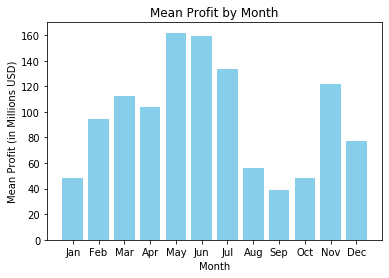

In [139]:
mean_roi_month = plt.bar(release_month_means.index, release_month_means, color = 'skyblue')
plt.xlabel("Month")
plt.ylabel("Mean Profit (in Millions USD)")
plt.title("Mean Profit by Month")
plt.xticks(range(1,13), ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"));

In [44]:
def genre_mean_ROI(df, genre_list):
    row_means = []
    for genre in genre_list:
        genre_filter = df.loc[(df["genre1"] == genre) | (df["genre2"] == genre) | (df["genre3"] == genre)]
        row_means.append(genre_filter.mean()["ROI"])
    return row_means

In [45]:
genre_list = ['Action', 'Adventure', 'Comedy', 'Horror', 'Drama', 'Biography', 'Crime', 'Animation', 'Fantasy', 'Documentary', 'Mystery', 'Thriller', 'Musical', 'Romance', 'Sci-Fi', 'Family', 'Music', 'Western', 'History', 'Sport', 'War']

In [46]:
genre_mean_ROI(total_df, genre_list)

[158166380.17256638,
 242286998.694051,
 92326332.92870906,
 50517684.96791444,
 45216215.98384926,
 54873788.59259259,
 47982740.03404255,
 276181736.75490195,
 159409570.37096775,
 24691181.296296295,
 63554352.5625,
 79785150.32462686,
 254266964.55555555,
 45319611.957671955,
 249117127.52985075,
 124610843.8,
 56460271.37254902,
 47218943.0,
 49439560.925,
 27435814.05882353,
 29517132.11764706]

Text(0.5, 1.0, 'Mean Profit by Genre')

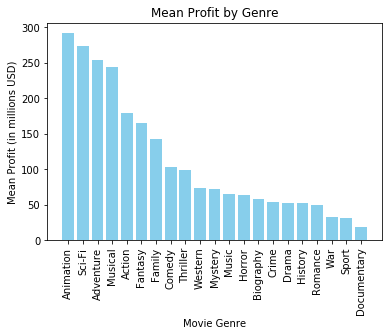

In [140]:
d = list(zip(genre_list, genre_mean_ROI(total_df, genre_list)))
roi_genre_df = pd.DataFrame(d, columns=['Genre','Mean ROI'])
# plt.bar(roi_genre_df.Genre, roi_genre_df['Mean ROI'])

# mean_roi_genre = plt.bar(genre_list, genre_mean_ROI(total_df, genre_list))
# plt.xticks(rotation="vertical");

sorted_roi_genre_df = roi_genre_df.sort_values(by='Mean ROI', ascending=False)
plt.bar(sorted_roi_genre_df.Genre, sorted_roi_genre_df['Mean ROI']/1000000, color='skyblue')
plt.xticks(rotation = "vertical");
plt.ylabel('Mean Profit (in millions USD)')
plt.xlabel('Movie Genre')
plt.title('Mean Profit by Genre')

In [48]:
total_df[total_df.duplicated("movie")]

movie  start_year  runtime_minutes  release_date  \
126           The Promise        2017              NaN  Apr 21, 2017   
127           The Promise        2017            114.0  Apr 21, 2017   
128           The Promise        2017              NaN  Apr 21, 2017   
133   Alice in Wonderland        2010             99.0   Mar 5, 2010   
147     The Bounty Hunter        2010              NaN  Mar 19, 2010   
165            The Prince        2014             71.0  Aug 22, 2014   
166            The Prince        2014             92.0  Aug 22, 2014   
179              Big Eyes        2014              NaN  Dec 25, 2014   
181             Burlesque        2010              NaN  Nov 24, 2010   
232             Leap Year        2010             94.0   Jan 8, 2010   
277              Hercules        2014            112.0  Jul 25, 2014   
286           The Tempest        2010            131.0  Dec 10, 2010   
331                 Cyrus        2010             91.0  Jun 18, 2010   
497         A Better Life        2011            110.0  Jun 24, 2011   
541             Abduction        2011             84.0  Sep 23, 2011   
555              Absentia        2011             60.0  Dec 31, 2011   
583             Underdogs        2013            102.0  Aug 16, 2013   
608            The Artist        2011            100.0  Nov 25, 2011   
616            Cinderella        2015            113.0  Mar 13, 2015   
641               Highway        2012             80.0  Dec 31, 2012   
661               Weekend        2011            121.0  Sep 23, 2011   
662               Weekend        2011             80.0  Sep 23, 2011   
716                 After        2012             83.0  Dec 31, 2012   
742            Crossroads        2015              NaN  Jun 23, 2015   
744               Sisters        2015             53.0  Dec 18, 2015   
765          The Darkness        2016             92.0  May 13, 2016   
770            Redemption        2013            115.0  Jun 28, 2013   
771            Redemption        2013            110.0  Jun 28, 2013   
772            Redemption        2013            106.0  Jun 28, 2013   
774             Spotlight        2015             99.0   Nov 6, 2015   
...                   ...         ...              ...           ...   
917              Addicted        2014             97.0  Oct 10, 2014   
924                  Home        2015             15.0  Mar 27, 2015   
925                  Home        2015              4.0  Mar 27, 2015   
926                  Home        2015             58.0  Mar 27, 2015   
973             Homefront        2013            111.0  Nov 27, 2013   
1004            Treachery        2013             73.0  Dec 31, 2013   
1006                 Coco        2017             98.0  Nov 22, 2017   
1024           The Family        2013            152.0  Sep 13, 2013   
1044           The Square        2013             52.0  Oct 25, 2013   
1134           The Circle        2017            110.0  Apr 28, 2017   
1135           The Circle        2017             65.0  Apr 28, 2017   
1181              Destiny        2014            105.0  Dec 31, 2014   
1186       Brotherly Love        2015             57.0  Apr 24, 2015   
1190                Heist        2015             47.0  Nov 13, 2015   
1212           The Forest        2016            109.0   Jan 8, 2016   
1242     The Night Before        2015             86.0  Nov 20, 2015   
1246                  Joe        2014              5.0  Apr 11, 2014   
1265             Brothers        2015            156.0  Aug 14, 2015   
1266             Brothers        2015             68.0  Aug 14, 2015   
1309             Stronger        2017            125.0  Sep 22, 2017   
1345             The Wall        2017              5.0  May 12, 2017   
1346             The Wall        2017              NaN  May 12, 2017   
1371           Robin Hood        2018            116.0  Nov 21, 2018   
1372           Robin Hood        2018              NaN  Nov 

In [49]:
total_df = total_df.loc[total_df.worldwide_gross > 100000]

In [50]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365 entries, 1 to 1546
Data columns (total 12 columns):
movie                1365 non-null object
start_year           1365 non-null int64
runtime_minutes      1352 non-null float64
release_date         1365 non-null object
production_budget    1365 non-null int64
domestic_gross       1365 non-null int64
worldwide_gross      1365 non-null int64
ROI                  1365 non-null int64
genre1               1361 non-null object
genre2               1219 non-null object
genre3               922 non-null object
release_month        1365 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 138.6+ KB


In [51]:
total_df = total_df[~total_df.duplicated("movie")]

In [52]:
total_df.head()

movie  start_year  runtime_minutes  release_date  \
1  The Secret Life of Walter Mitty        2013            114.0  Dec 25, 2013   
2      A Walk Among the Tombstones        2014            114.0  Sep 19, 2014   
3                   Jurassic World        2015            124.0  Jun 12, 2015   
4                    The Rum Diary        2011            119.0  Oct 28, 2011   
5                The Three Stooges        2012             92.0  Apr 13, 2012   

   production_budget  domestic_gross  worldwide_gross         ROI     genre1  \
1           91000000        58236838        187861183    96861183  Adventure   
2           28000000        26017685         62108587    34108587     Action   
3          215000000       652270625       1648854864  1433854864     Action   
4           45000000        13109815         21544732   -23455268     Comedy   
5           30000000        44338224         54052249    24052249     Comedy   

      genre2  genre3  release_month  
1     Comedy   Drama             12  
2      Crime   Drama              9  
3  Adventure  Sci-Fi              6  
4      Drama    None             10  
5     Family    None              4

In [53]:
imdb_crew_df = pd.read_csv("data/imdb.title.crew.csv.gz")

In [54]:
imdb_crew_df.head()

tconst                      directors              writers
0  tt0285252                      nm0899854            nm0899854
1  tt0438973                            NaN  nm0175726,nm1802864
2  tt0462036                      nm1940585            nm1940585
3  tt0835418                      nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502,nm2291498,nm2292011            nm0284943

In [55]:
imdb_namebasics_df = pd.read_csv("data/imdb.name.basics.csv.gz")
imdb_namebasics_df.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [56]:
directors_df = pd.merge(imdb_crew_df, imdb_namebasics_df, left_on='directors', right_on='nconst', left_index=True)
directors_df.head()

tconst  directors  \
21429   tt0285252  nm0899854   
133911  tt0462036  nm1940585   
87881   tt0835418  nm0151540   
87881   tt0859635  nm0151540   
131142  tt0879859  nm2416460   

                                                  writers     nconst  \
21429                                           nm0899854  nm0899854   
133911                                          nm1940585  nm1940585   
87881                                 nm0310087,nm0841532  nm0151540   
87881   nm0151540,nm0373571,nm0501399,nm0815418,nm0831479  nm0151540   
131142                                                NaN  nm2416460   

             primary_name  birth_year  death_year        primary_profession  \
21429         Tony Vitale      1964.0         NaN  producer,director,writer   
133911         Bill Haley         NaN         NaN  director,writer,producer   
87881   Jay Chandrasekhar      1968.0         NaN     director,actor,writer   
87881   Jay Chandrasekhar      1968.0         NaN     director,actor,writer   
131142    Eric Manchester         NaN         NaN           director,writer   

                               known_for_titles  
21429   tt0285252,tt0106489,tt0119465,tt0359774  
133911                      tt0462036,tt6740510  
87881   tt0144557,tt0486551,tt0331953,tt0247745  
87881   tt0144557,tt0486551,tt0331953,tt0247745  
131142                      tt0879861,tt0879859

In [57]:
whole_df = pd.merge(imdb_title_basics_df, directors_df, on="tconst")
whole_df.head()

tconst                            movie              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0111414                      A Thin Life                 A Thin Life   

   start_year  runtime_minutes              genres  directors  \
0        2013            175.0  Action,Crime,Drama  nm0712540   
1        2019            114.0     Biography,Drama  nm0002411   
2        2018            122.0               Drama  nm0000080   
3        2018              NaN        Comedy,Drama  nm0611531   
4        2018             75.0              Comedy  nm0398271   

                                   writers     nconst          primary_name  \
0  nm0023551,nm1194313,nm0347899,nm1391276  nm0712540   Harnam Singh Rawail   
1                                      NaN  nm0002411             Mani Kaul   
2                      nm0000080,nm0462648  nm0000080          Orson Welles   
3                                nm0347899  nm0611531  Hrishikesh Mukherjee   
4                                nm0398271  nm0398271          Frank Howson   

   birth_year  death_year        primary_profession  \
0      1921.0      2004.0  director,writer,producer   
1      1944.0      2011.0     director,writer,actor   
2      1915.0      1985.0     actor,director,writer   
3      1922.0      2006.0    director,editor,writer   
4      1952.0         NaN     actor,writer,producer   

                          known_for_titles  
0  tt0266757,tt0266712,tt0134996,tt0266765  
1  tt0102515,tt0070009,tt0066514,tt0207626  
2  tt0048393,tt0052311,tt0057427,tt0033467  
3  tt0066763,tt0147855,tt0137362,tt0137361  
4  tt0104271,tt0094789,tt0102076,tt0111414

In [58]:
whole_df = whole_df.drop(["tconst", "original_title", "genres", "writers", "directors", "nconst", "birth_year", "death_year", "primary_profession", "known_for_titles"], axis=1)

In [59]:
whole_df = whole_df.rename(columns = {"primary_name": "directors_name"})

In [60]:
# whole_df = whole_df.drop("director_name", axis=1)

KeyError: "['director_name'] not found in axis"

In [61]:
whole_df = pd.merge(total_df, whole_df, on="movie")
whole_df.head()

movie  start_year_x  runtime_minutes_x  \
0  The Secret Life of Walter Mitty          2013              114.0   
1      A Walk Among the Tombstones          2014              114.0   
2                   Jurassic World          2015              124.0   
3                    The Rum Diary          2011              119.0   
4                      John Carter          2012              132.0   

   release_date  production_budget  domestic_gross  worldwide_gross  \
0  Dec 25, 2013           91000000        58236838        187861183   
1  Sep 19, 2014           28000000        26017685         62108587   
2  Jun 12, 2015          215000000       652270625       1648854864   
3  Oct 28, 2011           45000000        13109815         21544732   
4   Mar 9, 2012          275000000        73058679        282778100   

          ROI     genre1     genre2  genre3  release_month  start_year_y  \
0    96861183  Adventure     Comedy   Drama             12          2013   
1    34108587     Action      Crime   Drama              9          2014   
2  1433854864     Action  Adventure  Sci-Fi              6          2015   
3   -23455268     Comedy      Drama    None             10          2011   
4     7778100     Action  Adventure  Sci-Fi              3          2012   

   runtime_minutes_y   directors_name  
0              114.0      Ben Stiller  
1              114.0      Scott Frank  
2              124.0  Colin Trevorrow  
3              119.0   Bruce Robinson  
4              132.0   Andrew Stanton

In [62]:
whole_df = whole_df.drop(["start_year_x", "runtime_minutes_x", "start_year_y", "runtime_minutes_y"], axis=1)
whole_df.head()

movie  release_date  production_budget  \
0  The Secret Life of Walter Mitty  Dec 25, 2013           91000000   
1      A Walk Among the Tombstones  Sep 19, 2014           28000000   
2                   Jurassic World  Jun 12, 2015          215000000   
3                    The Rum Diary  Oct 28, 2011           45000000   
4                      John Carter   Mar 9, 2012          275000000   

   domestic_gross  worldwide_gross         ROI     genre1     genre2  genre3  \
0        58236838        187861183    96861183  Adventure     Comedy   Drama   
1        26017685         62108587    34108587     Action      Crime   Drama   
2       652270625       1648854864  1433854864     Action  Adventure  Sci-Fi   
3        13109815         21544732   -23455268     Comedy      Drama    None   
4        73058679        282778100     7778100     Action  Adventure  Sci-Fi   

   release_month   directors_name  
0             12      Ben Stiller  
1              9      Scott Frank  
2              6  Colin Trevorrow  
3             10   Bruce Robinson  
4              3   Andrew Stanton

In [63]:
whole_df = whole_df[~whole_df.duplicated("movie")]

In [64]:
directors_dict = dict(whole_df.directors_name.value_counts())

In [65]:
directors_dict["Ben Stiller"]

2

In [66]:
whole_df.head()

movie  release_date  production_budget  \
0  The Secret Life of Walter Mitty  Dec 25, 2013           91000000   
1      A Walk Among the Tombstones  Sep 19, 2014           28000000   
2                   Jurassic World  Jun 12, 2015          215000000   
3                    The Rum Diary  Oct 28, 2011           45000000   
4                      John Carter   Mar 9, 2012          275000000   

   domestic_gross  worldwide_gross         ROI     genre1     genre2  genre3  \
0        58236838        187861183    96861183  Adventure     Comedy   Drama   
1        26017685         62108587    34108587     Action      Crime   Drama   
2       652270625       1648854864  1433854864     Action  Adventure  Sci-Fi   
3        13109815         21544732   -23455268     Comedy      Drama    None   
4        73058679        282778100     7778100     Action  Adventure  Sci-Fi   

   release_month   directors_name  
0             12      Ben Stiller  
1              9      Scott Frank  
2              6  Colin Trevorrow  
3             10   Bruce Robinson  
4              3   Andrew Stanton

In [67]:
def genre_mean_DG(df, genre_list):
    row_means = []
    for genre in genre_list:
        genre_filter = df.loc[(df["genre1"] == genre) | (df["genre2"] == genre) | (df["genre3"] == genre)]
        row_means.append(genre_filter.mean()["domestic_gross"])
    return row_means

In [68]:
genre_mean_DG(total_df, genre_list)

[96102099.99255583,
 128549351.17159763,
 64652293.38660907,
 38388898.711267605,
 37299505.86228482,
 41288102.503937006,
 39178976.53953488,
 142152656.6701031,
 86970618.04424779,
 13998780.76923077,
 42725488.20869565,
 52293564.34862386,
 126778813.16666667,
 35654503.52046783,
 137190354.09836066,
 87507744.92857143,
 38957334.72093023,
 66373697.375,
 41921455.666666664,
 37212879.333333336,
 25663633.3125]

<BarContainer object of 21 artists>

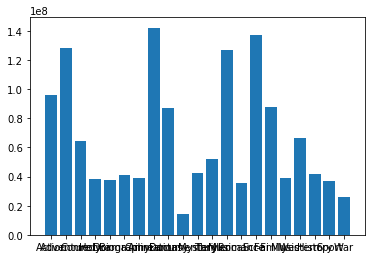

In [69]:
d = list(zip(genre_list, genre_mean_DG(total_df, genre_list)))
dg_genre_df = pd.DataFrame(d, columns=['Genre','Mean DG'])
plt.bar(dg_genre_df.Genre, dg_genre_df['Mean DG'])

(0.0, 263.1403457041237)

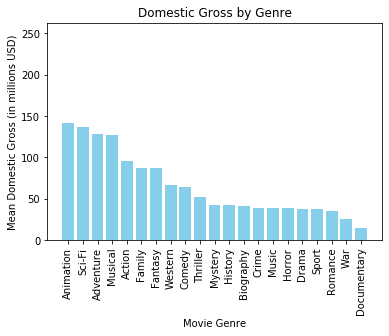

In [135]:
sorted_dg_genre_df = dg_genre_df.sort_values(by='Mean DG', ascending=False)
plt.bar(sorted_dg_genre_df.Genre, sorted_dg_genre_df['Mean DG']/1000000, color = 'skyblue')
plt.xticks(rotation = "vertical");
plt.ylabel('Mean Domestic Gross (in millions USD)')
plt.xlabel('Movie Genre')
plt.title('Domestic Gross by Genre')
plt.ylim(0.0, 263.1403457041237)

In [71]:
total_df['intl_gross'] = total_df.worldwide_gross - total_df.domestic_gross

<BarContainer object of 21 artists>

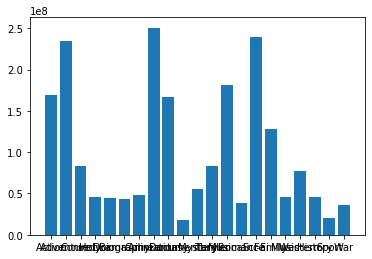

In [72]:
def genre_mean_IG(df, genre_list):
    row_means = []
    for genre in genre_list:
        genre_filter = df.loc[(df["genre1"] == genre) | (df["genre2"] == genre) | (df["genre3"] == genre)]
        row_means.append(genre_filter.mean()["intl_gross"])
    return row_means

d = list(zip(genre_list, genre_mean_IG(total_df, genre_list)))
ig_genre_df = pd.DataFrame(d, columns=['Genre','Mean IG'])
plt.bar(ig_genre_df.Genre, ig_genre_df['Mean IG'])

(0.0, 263.1403457041237)

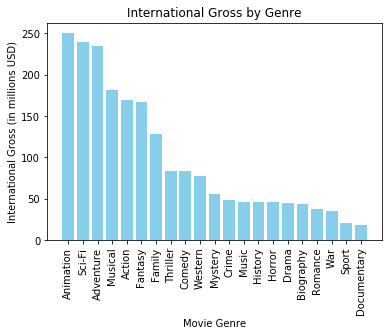

In [136]:
sorted_ig_genre_df = ig_genre_df.sort_values(by='Mean IG', ascending=False)
plt.bar(sorted_ig_genre_df.Genre, (sorted_ig_genre_df['Mean IG']/1000000), color = 'skyblue')
plt.xticks(rotation = "vertical");
plt.ylabel('International Gross (in millions USD)')
plt.xlabel('Movie Genre')
plt.title('International Gross by Genre')
plt.ylim()

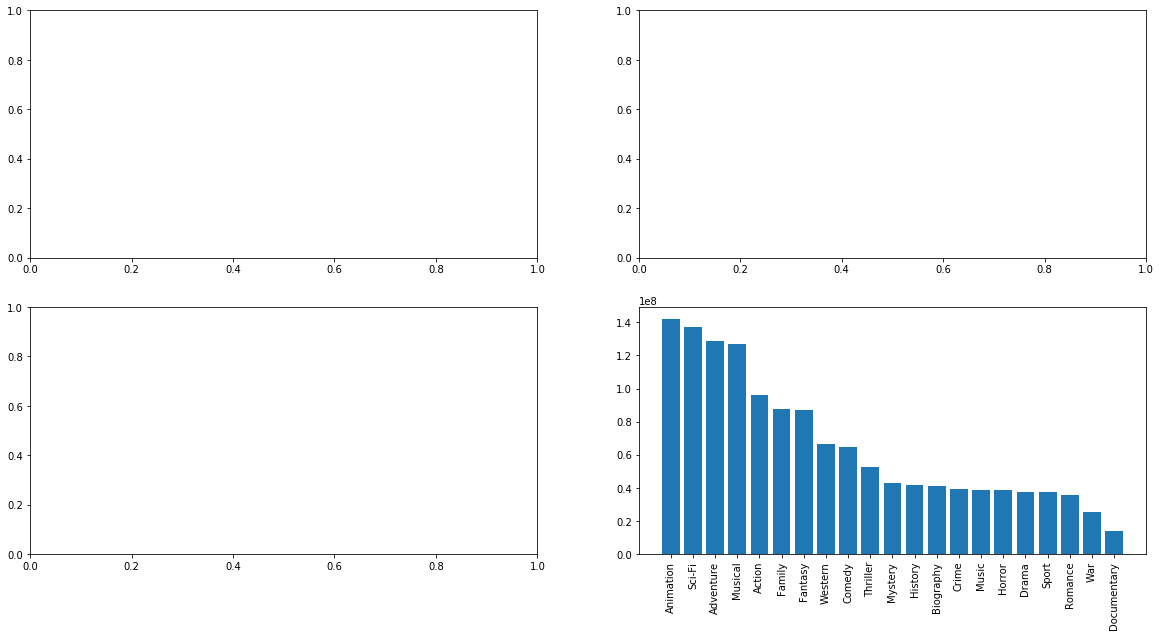

In [109]:
fig, axs = plt.subplots(2,2, figsize=(20, 10))

axs[0,0] = plt.bar(sorted_dg_genre_df.Genre, sorted_dg_genre_df['Mean DG'])
plt.xticks(rotation = "vertical")

axs[1,1] = plt.bar(sorted_ig_genre_df.Genre, (sorted_ig_genre_df['Mean IG']/1000000))
plt.xticks(rotation = "vertical");




1. Mean ROI by Genre
2. Domestic Gross by Genre
3. International Gross by Genre
4. Mean ROI by Release Month

In [164]:
dg = list(zip(genre_list, genre_mean_DG(total_df, genre_list)))
dg_genre_df = pd.DataFrame(dg, columns=['Genre','Mean DG'])
# plt.bar(dg_genre_df.Genre, dg_genre_df['Mean DG'])
sorted_dg_genre_df = dg_genre_df.sort_values(by='Mean DG', ascending=False)

ig = list(zip(genre_list, genre_mean_IG(total_df, genre_list)))
ig_genre_df = pd.DataFrame(ig, columns=['Genre','Mean IG'])
sorted_ig_genre_df = ig_genre_df.sort_values(by='Mean IG', ascending=False)

In [173]:
dg_ig_df = pd.merge(sorted_dg_genre_df, sorted_ig_genre_df, on=['Genre'])

dg_ig_df['Mean DG'] = dg_ig_df['Mean DG']/1000000
dg_ig_df['Mean IG'] = dg_ig_df['Mean IG']/1000000
dg_ig_df.head()

Genre     Mean DG     Mean IG
0  Animation  142.152657  250.609853
1     Sci-Fi  137.190354  239.145102
2  Adventure  128.549351  234.835356
3    Musical  126.778813  181.356043
4     Action   96.102100  169.172279

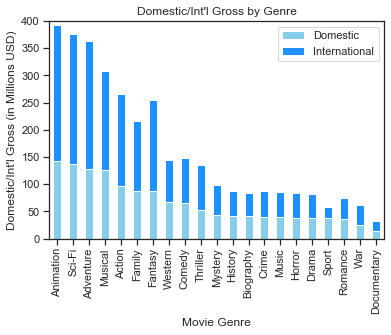

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("ticks")
stacked_plot = dg_ig_df.set_index('Genre').plot(kind='bar', stacked=True, color=['skyblue','dodgerblue'])
stacked_plot.set(ylim=(0, 400))
stacked_plot.set(xlabel='Movie Genre', ylabel='Domestic/Int\'l Gross (in Millions USD)')
stacked_plot.set_title('Domestic/Int\'l Gross by Genre')
stacked_plot.legend(['Domestic', 'International']);

In [153]:
# total_df = pd.merge(imdb_title_basics_df, tn_budgets_df, on=["movie", "start_year"])


In [154]:
dg_ig_df

Genre       Mean DG       Mean IG
0        Action  9.610210e+07  1.691723e+08
1     Adventure  1.285494e+08  2.348354e+08
2        Comedy  6.465229e+07  8.299990e+07
3        Horror  3.838890e+07  4.576275e+07
4         Drama  3.729951e+07  4.469719e+07
5     Biography  4.128810e+07  4.328326e+07
6         Crime  3.917898e+07  4.818214e+07
7     Animation  1.421527e+08  2.506099e+08
8       Fantasy  8.697062e+07  1.672561e+08
9   Documentary  1.399878e+07  1.792862e+07
10      Mystery  4.272549e+07  5.570690e+07
11     Thriller  5.229356e+07  8.371310e+07
12      Musical  1.267788e+08  1.813560e+08
13      Romance  3.565450e+07  3.805745e+07
14       Sci-Fi  1.371904e+08  2.391451e+08
15       Family  8.750774e+07  1.286146e+08
16        Music  3.895733e+07  4.603684e+07
17      Western  6.637370e+07  7.751989e+07
18      History  4.192146e+07  4.590117e+07
19        Sport  3.721288e+07  2.053388e+07
20          War  2.566363e+07  3.572408e+07

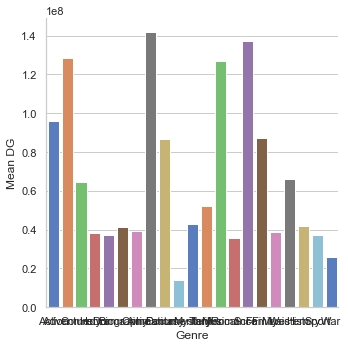

In [159]:
import seaborn as sns
sns.set(style="whitegrid")

# # Load the example Titanic dataset
# titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Genre", y="Mean DG", data=dg_ig_df, kind="bar", palette="muted")
# g.despine(left=True)
# g.set_ylabels("survival probability")

In [196]:
total_df.head()

movie  start_year  runtime_minutes  release_date  \
1  The Secret Life of Walter Mitty        2013            114.0  Dec 25, 2013   
2      A Walk Among the Tombstones        2014            114.0  Sep 19, 2014   
3                   Jurassic World        2015            124.0  Jun 12, 2015   
4                    The Rum Diary        2011            119.0  Oct 28, 2011   
5                The Three Stooges        2012             92.0  Apr 13, 2012   

   production_budget  domestic_gross  worldwide_gross         ROI     genre1  \
1           91000000        58236838        187861183    96861183  Adventure   
2           28000000        26017685         62108587    34108587     Action   
3          215000000       652270625       1648854864  1433854864     Action   
4           45000000        13109815         21544732   -23455268     Comedy   
5           30000000        44338224         54052249    24052249     Comedy   

      genre2  genre3  release_month  intl_gross  
1     Comedy   Drama             12   129624345  
2      Crime   Drama              9    36090902  
3  Adventure  Sci-Fi              6   996584239  
4      Drama    None             10     8434917  
5     Family    None              4     9714025

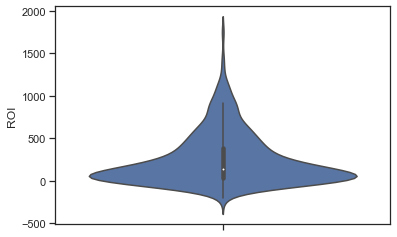

In [210]:
# sns.violinplot(x=total)
adv_violin = total_df.loc[(total_df.genre1 == 'Adventure') | (total_df.genre2 == 'Adventure') | (total_df.genre3 == 'Adventure')]

sns.violinplot(y=adv_violin.ROI/1000000)

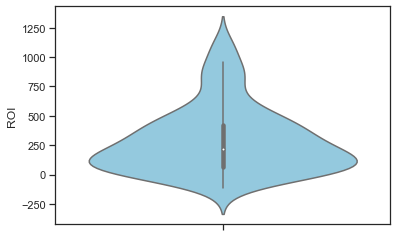

In [213]:
ani_violin = total_df.loc[(total_df.genre1 == 'Animation') | (total_df.genre2 == 'Animation') | (total_df.genre3 == 'Animation')]

sns.violinplot(y=ani_violin.ROI/1000000, color = 'skyblue')

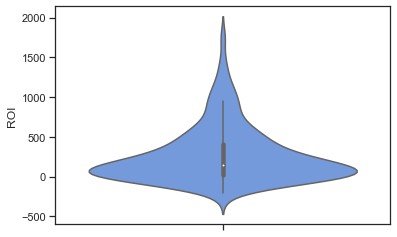

In [214]:
sci_violin = total_df.loc[(total_df.genre1 == 'Sci-Fi') | (total_df.genre2 == 'Sci-Fi') | (total_df.genre3 == 'Sci-Fi')]

sns.violinplot(y=sci_violin.ROI/1000000, color = 'cornflowerblue')

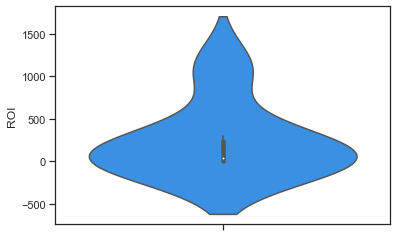

In [215]:
mus_violin = total_df.loc[(total_df.genre1 == 'Musical') | (total_df.genre2 == 'Musical') | (total_df.genre3 == 'Musical')]

sns.violinplot(y=mus_violin.ROI/1000000, color = 'dodgerblue')